In [2]:
!pip install segmentation_models_pytorch warmup_scheduler albumentations -q


In [1]:
import os
import sys
import random
from glob import glob
import warnings

import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2

sys.path.append('/kaggle/working/notebook/experiment/2d')
from script.helper import *
from script.dataset import *
from script.metrics import *
from script.trainer import *
from script.model import *
from script.loss import *
from script.scheduler import *


## config

In [2]:
class CFG:
    # ============== comp exp name =============
    comp_name = 'vesuvius'
    comp_dir_path = '/kaggle/input/'
    comp_folder_name = 'vesuvius-challenge-ink-detection'

    dataset_path = "/kaggle/working/dataset_train/"
    train_dataset_path = "/kaggle/working/dataset_train/nonflatten/29-34/"

    exp_name = os.getcwd().split('/')[-1]

    # ============== model cfg =============
    model_name = 'Unet'
    backbone = 'efficientnet-b0'
    in_chans = 6

    # ============== pred target =============
    target_size = 1

    # ============== training cfg =============
    size = 224
    tile_size = 224
    stride = tile_size // 2

    train_batch_size = 16  # 32
    valid_batch_size = train_batch_size * 2
    use_amp = True

    scheduler = 'GradualWarmupSchedulerV2'
    # scheduler = 'CosineAnnealingLR'

    epochs = 20  # 15

    warmup_factor = 10
    lr = 1e-4 / warmup_factor

    # ============== fold =============
    metric_direction = 'maximize'  # maximize, 'minimize'

    # ============== fixed =============
    pretrained = True
    inf_weight = 'best'  # 'best'

    min_lr = 1e-6
    weight_decay = 1e-6
    max_grad_norm = 1000

    print_freq = 50
    num_workers = 4

    seed = 42

    # ============== augmentation =============
    train_aug_list = [
        A.Resize(size, size),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.75),
        A.ShiftScaleRotate(p=0.75),
        A.OneOf([
                A.GaussNoise(var_limit=[10, 50]),
                A.GaussianBlur(),
                A.MotionBlur(),
                ], p=0.4),
        A.GridDistortion(num_steps=5, distort_limit=0.3, p=0.5),
        A.CoarseDropout(max_holes=1, max_width=int(size * 0.3), max_height=int(size * 0.3),
                        mask_fill_value=0, p=0.5),
        A.Normalize(
            mean=[0] * in_chans,
            std=[1] * in_chans,
            max_pixel_value=65535,
        ),
        ToTensorV2(transpose_mask=True),
    ]

    valid_aug_list = [
        A.Resize(size, size),
        A.Normalize(
            mean=[0] * in_chans,
            std=[1] * in_chans,
            max_pixel_value=65535,
        ),
        ToTensorV2(transpose_mask=True),
    ]


warnings.filterwarnings("ignore")
torch.backends.cudnn.benchmark = True  # type: ignore

set_seed(CFG.seed)
os.makedirs(f'./{CFG.exp_name}/', exist_ok=True)


## Dataset

In [3]:
def preprocess(image, fragment_i, split_i):
    # image=np.clip(image, a_min=0.15,a_max=0.7)
    return image



len(train_images) = 14624
train_images[0].shape = (224, 224, 6)
train_labels[0].shape = (224, 224, 1)
train_masks[0].shape = (224, 224, 1)

len(valid_images) = 4161
valid_images[0].shape = (224, 224, 6)
valid_labels[0].shape = (224, 224, 1)



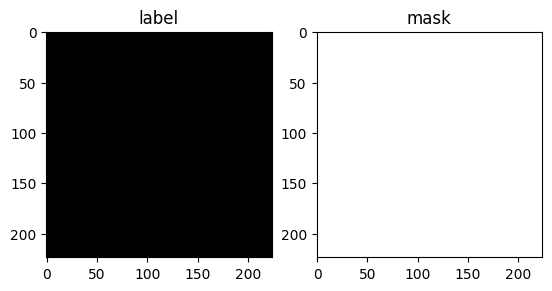

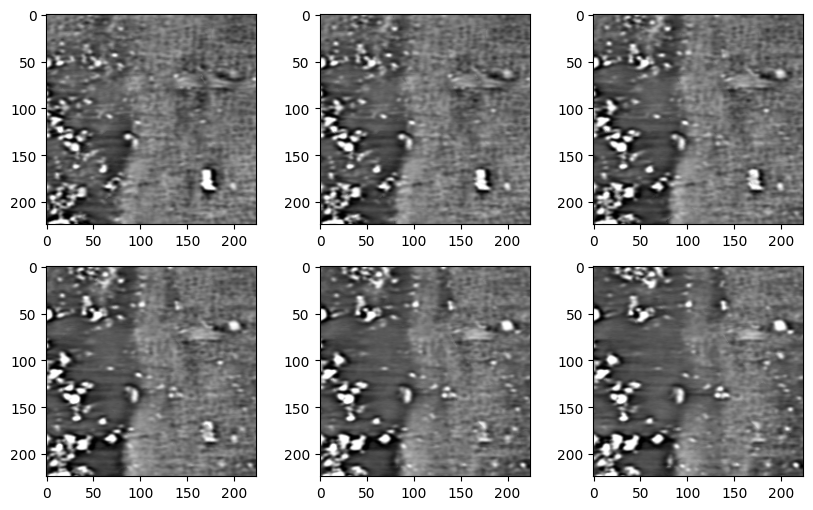

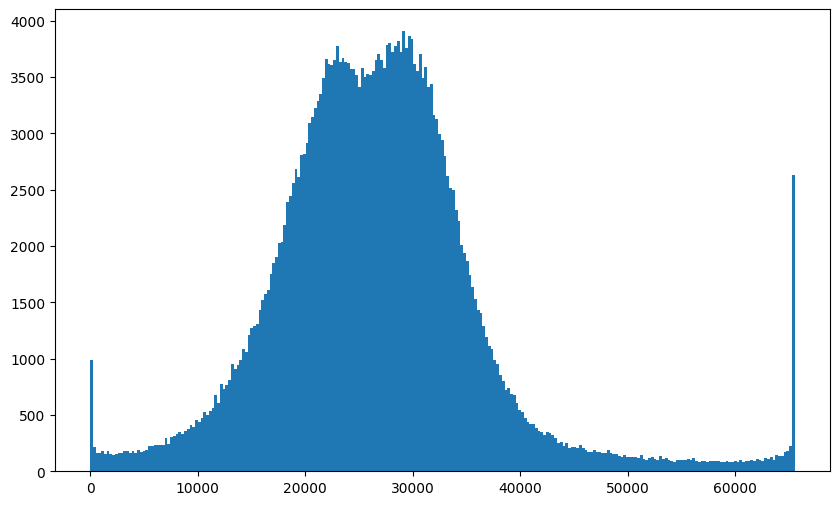

In [6]:
# confirmation

valid_fragment_i = 1
valid_split_i = 0

train_images, train_labels, train_masks, valid_images, valid_labels, valid_xyxys = get_train_valid_dataset(valid_fragment_i, valid_split_i, CFG, preprocess)

print(f"""
{len(train_images) = }
{train_images[0].shape = }
{train_labels[0].shape = }
{train_masks[0].shape = }

{len(valid_images) = }
{valid_images[0].shape = }
{valid_labels[0].shape = }
""")

id = random.randint(0, len(train_labels))
visualize_train_images(id, train_images, train_labels, train_masks)


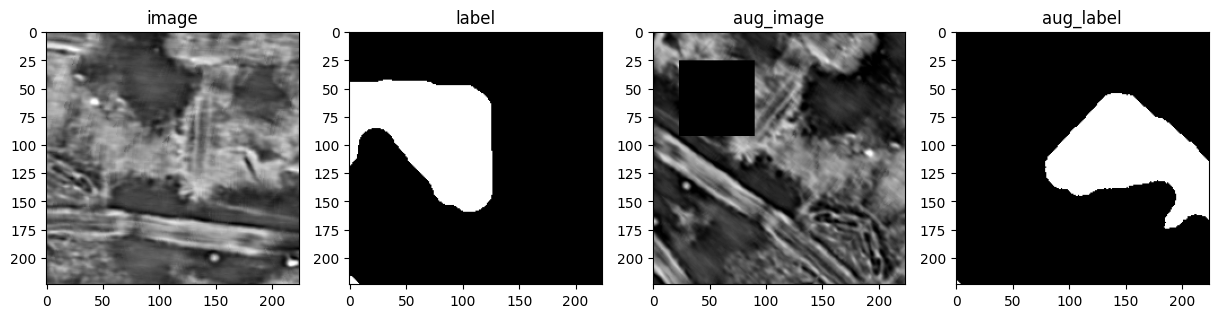

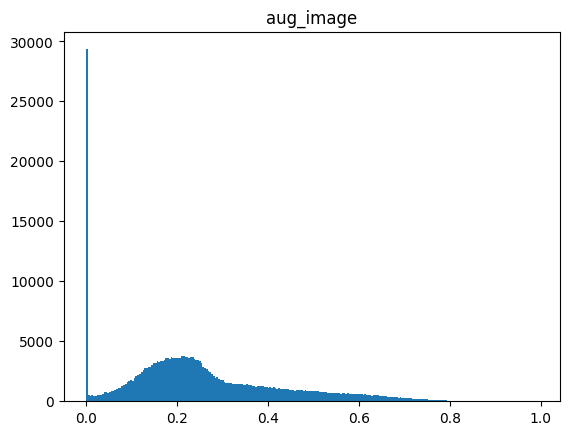

In [7]:
# confirmation
plot_dataset = CustomDataset(train_images, CFG, labels=train_labels)
visualize_dataset(plot_dataset, CFG)


## main

In [8]:
train_and_evaluate(preprocess, CFG)
!curl -X POST -H 'Authorization: Bearer '$LINE -F 'message=セルの実行が終わりました！' https://notify-api.line.me/api/notify

fold: 0


100%|██████████| 131/131 [00:04<00:00, 31.80it/s]


fbeta: 0.1288
Epoch 1 - avg_train_loss: 0.6077  avg_val_loss: 0.4159  avgScore: 0.1288  time: 45s
Epoch 1 - Save Best Loss: 0.4159  Best Score: 0.1288 Model



100%|██████████| 131/131 [00:03<00:00, 33.88it/s]


fbeta: 0.1838
Epoch 2 - avg_train_loss: 0.3793  avg_val_loss: 0.3134  avgScore: 0.1838  time: 45s
Epoch 2 - Save Best Loss: 0.3134  Best Score: 0.1838 Model



100%|██████████| 131/131 [00:03<00:00, 33.87it/s]


fbeta: 0.2917
Epoch 3 - avg_train_loss: 0.2781  avg_val_loss: 0.2476  avgScore: 0.2917  time: 44s
Epoch 3 - Save Best Loss: 0.2476  Best Score: 0.2917 Model



100%|██████████| 131/131 [00:03<00:00, 34.58it/s]


fbeta: 0.3635
Epoch 4 - avg_train_loss: 0.2477  avg_val_loss: 0.2420  avgScore: 0.3635  time: 45s
Epoch 4 - Save Best Loss: 0.2420  Best Score: 0.3635 Model



100%|██████████| 131/131 [00:03<00:00, 34.23it/s]


fbeta: 0.4368
Epoch 5 - avg_train_loss: 0.2400  avg_val_loss: 0.2449  avgScore: 0.4368  time: 44s
Epoch 5 - Save Best Loss: 0.2449  Best Score: 0.4368 Model



100%|██████████| 131/131 [00:03<00:00, 33.93it/s]


fbeta: 0.4140
Epoch 6 - avg_train_loss: 0.2288  avg_val_loss: 0.2502  avgScore: 0.4140  time: 45s



100%|██████████| 131/131 [00:03<00:00, 34.17it/s]


fbeta: 0.3820
Epoch 7 - avg_train_loss: 0.2231  avg_val_loss: 0.2474  avgScore: 0.3820  time: 45s



100%|██████████| 131/131 [00:03<00:00, 34.12it/s]


fbeta: 0.4735
Epoch 8 - avg_train_loss: 0.2147  avg_val_loss: 0.2383  avgScore: 0.4735  time: 44s
Epoch 8 - Save Best Loss: 0.2383  Best Score: 0.4735 Model



100%|██████████| 131/131 [00:03<00:00, 33.98it/s]


fbeta: 0.4851
Epoch 9 - avg_train_loss: 0.2092  avg_val_loss: 0.2351  avgScore: 0.4851  time: 45s
Epoch 9 - Save Best Loss: 0.2351  Best Score: 0.4851 Model



100%|██████████| 131/131 [00:03<00:00, 33.78it/s]


fbeta: 0.4819
Epoch 10 - avg_train_loss: 0.2037  avg_val_loss: 0.2489  avgScore: 0.4819  time: 45s



100%|██████████| 131/131 [00:03<00:00, 34.08it/s]


fbeta: 0.5071
Epoch 11 - avg_train_loss: 0.1996  avg_val_loss: 0.2315  avgScore: 0.5071  time: 44s
Epoch 11 - Save Best Loss: 0.2315  Best Score: 0.5071 Model



100%|██████████| 131/131 [00:03<00:00, 33.65it/s]


fbeta: 0.4826
Epoch 12 - avg_train_loss: 0.1951  avg_val_loss: 0.2555  avgScore: 0.4826  time: 45s



100%|██████████| 131/131 [00:03<00:00, 34.08it/s]


fbeta: 0.4934
Epoch 13 - avg_train_loss: 0.1884  avg_val_loss: 0.2512  avgScore: 0.4934  time: 44s



100%|██████████| 131/131 [00:03<00:00, 34.16it/s]


fbeta: 0.4795
Epoch 14 - avg_train_loss: 0.1870  avg_val_loss: 0.2515  avgScore: 0.4795  time: 44s



100%|██████████| 131/131 [00:03<00:00, 34.36it/s]


fbeta: 0.5038
Epoch 15 - avg_train_loss: 0.1790  avg_val_loss: 0.2578  avgScore: 0.5038  time: 45s



100%|██████████| 131/131 [00:03<00:00, 34.30it/s]


fbeta: 0.4915
Epoch 16 - avg_train_loss: 0.1787  avg_val_loss: 0.2869  avgScore: 0.4915  time: 46s



100%|██████████| 131/131 [00:03<00:00, 34.50it/s]


fbeta: 0.5089
Epoch 17 - avg_train_loss: 0.1755  avg_val_loss: 0.2606  avgScore: 0.5089  time: 45s
Epoch 17 - Save Best Loss: 0.2606  Best Score: 0.5089 Model



100%|██████████| 131/131 [00:03<00:00, 33.90it/s]


fbeta: 0.4997
Epoch 18 - avg_train_loss: 0.1737  avg_val_loss: 0.2630  avgScore: 0.4997  time: 45s



100%|██████████| 131/131 [00:03<00:00, 34.02it/s]


fbeta: 0.5071
Epoch 19 - avg_train_loss: 0.1729  avg_val_loss: 0.2606  avgScore: 0.5071  time: 45s



100%|██████████| 131/131 [00:03<00:00, 33.95it/s]


fbeta: 0.5077
Epoch 20 - avg_train_loss: 0.1708  avg_val_loss: 0.2581  avgScore: 0.5077  time: 45s

fold: 1


100%|██████████| 120/120 [00:03<00:00, 33.42it/s]


fbeta: 0.1803
Epoch 1 - avg_train_loss: 0.7056  avg_val_loss: 0.4471  avgScore: 0.1803  time: 46s
Epoch 1 - Save Best Loss: 0.4471  Best Score: 0.1803 Model



100%|██████████| 120/120 [00:03<00:00, 33.92it/s]


fbeta: 0.2518
Epoch 2 - avg_train_loss: 0.4529  avg_val_loss: 0.2765  avgScore: 0.2518  time: 46s
Epoch 2 - Save Best Loss: 0.2765  Best Score: 0.2518 Model



100%|██████████| 120/120 [00:03<00:00, 33.93it/s]


fbeta: 0.2934
Epoch 3 - avg_train_loss: 0.2901  avg_val_loss: 0.1517  avgScore: 0.2934  time: 47s
Epoch 3 - Save Best Loss: 0.1517  Best Score: 0.2934 Model



100%|██████████| 120/120 [00:03<00:00, 34.47it/s]


fbeta: 0.4318
Epoch 4 - avg_train_loss: 0.2641  avg_val_loss: 0.1501  avgScore: 0.4318  time: 47s
Epoch 4 - Save Best Loss: 0.1501  Best Score: 0.4318 Model



100%|██████████| 120/120 [00:03<00:00, 33.91it/s]


fbeta: 0.4671
Epoch 5 - avg_train_loss: 0.2536  avg_val_loss: 0.1418  avgScore: 0.4671  time: 45s
Epoch 5 - Save Best Loss: 0.1418  Best Score: 0.4671 Model



100%|██████████| 120/120 [00:03<00:00, 33.62it/s]


fbeta: 0.4959
Epoch 6 - avg_train_loss: 0.2430  avg_val_loss: 0.1398  avgScore: 0.4959  time: 45s
Epoch 6 - Save Best Loss: 0.1398  Best Score: 0.4959 Model



100%|██████████| 120/120 [00:03<00:00, 34.18it/s]


fbeta: 0.5193
Epoch 7 - avg_train_loss: 0.2375  avg_val_loss: 0.1383  avgScore: 0.5193  time: 46s
Epoch 7 - Save Best Loss: 0.1383  Best Score: 0.5193 Model



100%|██████████| 120/120 [00:03<00:00, 33.58it/s]


fbeta: 0.5354
Epoch 8 - avg_train_loss: 0.2302  avg_val_loss: 0.1374  avgScore: 0.5354  time: 46s
Epoch 8 - Save Best Loss: 0.1374  Best Score: 0.5354 Model



100%|██████████| 120/120 [00:03<00:00, 33.75it/s]


fbeta: 0.5505
Epoch 9 - avg_train_loss: 0.2262  avg_val_loss: 0.1375  avgScore: 0.5505  time: 46s
Epoch 9 - Save Best Loss: 0.1375  Best Score: 0.5505 Model



100%|██████████| 120/120 [00:03<00:00, 33.94it/s]


fbeta: 0.5369
Epoch 10 - avg_train_loss: 0.2176  avg_val_loss: 0.1483  avgScore: 0.5369  time: 46s



100%|██████████| 120/120 [00:03<00:00, 33.98it/s]


fbeta: 0.5192
Epoch 11 - avg_train_loss: 0.2137  avg_val_loss: 0.1462  avgScore: 0.5192  time: 45s



100%|██████████| 120/120 [00:03<00:00, 33.42it/s]


fbeta: 0.5383
Epoch 12 - avg_train_loss: 0.2089  avg_val_loss: 0.1436  avgScore: 0.5383  time: 46s



100%|██████████| 120/120 [00:03<00:00, 33.00it/s]


fbeta: 0.5469
Epoch 13 - avg_train_loss: 0.2014  avg_val_loss: 0.1504  avgScore: 0.5469  time: 46s



100%|██████████| 120/120 [00:03<00:00, 33.38it/s]


fbeta: 0.5594
Epoch 14 - avg_train_loss: 0.1960  avg_val_loss: 0.1514  avgScore: 0.5594  time: 46s
Epoch 14 - Save Best Loss: 0.1514  Best Score: 0.5594 Model



100%|██████████| 120/120 [00:03<00:00, 34.60it/s]


fbeta: 0.5337
Epoch 15 - avg_train_loss: 0.1937  avg_val_loss: 0.1538  avgScore: 0.5337  time: 45s



100%|██████████| 120/120 [00:03<00:00, 33.82it/s]


fbeta: 0.5310
Epoch 16 - avg_train_loss: 0.1894  avg_val_loss: 0.1472  avgScore: 0.5310  time: 45s



100%|██████████| 120/120 [00:03<00:00, 34.11it/s]


fbeta: 0.5446
Epoch 17 - avg_train_loss: 0.1880  avg_val_loss: 0.1492  avgScore: 0.5446  time: 45s



100%|██████████| 120/120 [00:03<00:00, 33.90it/s]


fbeta: 0.5238
Epoch 18 - avg_train_loss: 0.1849  avg_val_loss: 0.1574  avgScore: 0.5238  time: 46s



100%|██████████| 120/120 [00:03<00:00, 33.82it/s]


fbeta: 0.5385
Epoch 19 - avg_train_loss: 0.1827  avg_val_loss: 0.1553  avgScore: 0.5385  time: 46s



100%|██████████| 120/120 [00:03<00:00, 34.21it/s]


fbeta: 0.5277
Epoch 20 - avg_train_loss: 0.1811  avg_val_loss: 0.1529  avgScore: 0.5277  time: 45s

fold: 2


100%|██████████| 120/120 [00:03<00:00, 34.10it/s]


fbeta: 0.1290
Epoch 1 - avg_train_loss: 0.5859  avg_val_loss: 0.4940  avgScore: 0.1290  time: 46s
Epoch 1 - Save Best Loss: 0.4940  Best Score: 0.1290 Model



100%|██████████| 120/120 [00:03<00:00, 33.49it/s]


fbeta: 0.1927
Epoch 2 - avg_train_loss: 0.3879  avg_val_loss: 0.4162  avgScore: 0.1927  time: 46s
Epoch 2 - Save Best Loss: 0.4162  Best Score: 0.1927 Model



100%|██████████| 120/120 [00:03<00:00, 34.23it/s]


fbeta: 0.3804
Epoch 3 - avg_train_loss: 0.2496  avg_val_loss: 0.3408  avgScore: 0.3804  time: 46s
Epoch 3 - Save Best Loss: 0.3408  Best Score: 0.3804 Model



100%|██████████| 120/120 [00:03<00:00, 33.92it/s]


fbeta: 0.4380
Epoch 4 - avg_train_loss: 0.2171  avg_val_loss: 0.3624  avgScore: 0.4380  time: 46s
Epoch 4 - Save Best Loss: 0.3624  Best Score: 0.4380 Model



100%|██████████| 120/120 [00:03<00:00, 33.74it/s]


fbeta: 0.3595
Epoch 5 - avg_train_loss: 0.2120  avg_val_loss: 0.3561  avgScore: 0.3595  time: 46s



100%|██████████| 120/120 [00:03<00:00, 33.71it/s]


fbeta: 0.4304
Epoch 6 - avg_train_loss: 0.1987  avg_val_loss: 0.3524  avgScore: 0.4304  time: 46s



100%|██████████| 120/120 [00:03<00:00, 33.68it/s]


fbeta: 0.4767
Epoch 7 - avg_train_loss: 0.1961  avg_val_loss: 0.3670  avgScore: 0.4767  time: 46s
Epoch 7 - Save Best Loss: 0.3670  Best Score: 0.4767 Model



100%|██████████| 120/120 [00:03<00:00, 33.91it/s]


fbeta: 0.4826
Epoch 8 - avg_train_loss: 0.1918  avg_val_loss: 0.3428  avgScore: 0.4826  time: 46s
Epoch 8 - Save Best Loss: 0.3428  Best Score: 0.4826 Model



100%|██████████| 120/120 [00:03<00:00, 33.10it/s]


fbeta: 0.4724
Epoch 9 - avg_train_loss: 0.1854  avg_val_loss: 0.3600  avgScore: 0.4724  time: 46s



100%|██████████| 120/120 [00:03<00:00, 33.84it/s]


fbeta: 0.5007
Epoch 10 - avg_train_loss: 0.1804  avg_val_loss: 0.3632  avgScore: 0.5007  time: 46s
Epoch 10 - Save Best Loss: 0.3632  Best Score: 0.5007 Model



100%|██████████| 120/120 [00:03<00:00, 34.74it/s]


fbeta: 0.5161
Epoch 11 - avg_train_loss: 0.1740  avg_val_loss: 0.3546  avgScore: 0.5161  time: 45s
Epoch 11 - Save Best Loss: 0.3546  Best Score: 0.5161 Model



100%|██████████| 120/120 [00:03<00:00, 34.40it/s]


fbeta: 0.5111
Epoch 12 - avg_train_loss: 0.1715  avg_val_loss: 0.3470  avgScore: 0.5111  time: 46s



100%|██████████| 120/120 [00:03<00:00, 34.69it/s]


fbeta: 0.4948
Epoch 13 - avg_train_loss: 0.1664  avg_val_loss: 0.3708  avgScore: 0.4948  time: 45s



100%|██████████| 120/120 [00:03<00:00, 34.78it/s]


fbeta: 0.5000
Epoch 14 - avg_train_loss: 0.1619  avg_val_loss: 0.3918  avgScore: 0.5000  time: 45s



100%|██████████| 120/120 [00:03<00:00, 34.72it/s]


fbeta: 0.5185
Epoch 15 - avg_train_loss: 0.1585  avg_val_loss: 0.3621  avgScore: 0.5185  time: 45s
Epoch 15 - Save Best Loss: 0.3621  Best Score: 0.5185 Model



100%|██████████| 120/120 [00:03<00:00, 33.47it/s]


fbeta: 0.5160
Epoch 16 - avg_train_loss: 0.1570  avg_val_loss: 0.3922  avgScore: 0.5160  time: 45s



100%|██████████| 120/120 [00:03<00:00, 34.34it/s]


fbeta: 0.5069
Epoch 17 - avg_train_loss: 0.1543  avg_val_loss: 0.4004  avgScore: 0.5069  time: 45s



100%|██████████| 120/120 [00:03<00:00, 34.35it/s]


fbeta: 0.5143
Epoch 18 - avg_train_loss: 0.1514  avg_val_loss: 0.3892  avgScore: 0.5143  time: 45s



100%|██████████| 120/120 [00:03<00:00, 34.80it/s]


fbeta: 0.5135
Epoch 19 - avg_train_loss: 0.1503  avg_val_loss: 0.3953  avgScore: 0.5135  time: 45s



100%|██████████| 120/120 [00:03<00:00, 34.44it/s]


fbeta: 0.5165
Epoch 20 - avg_train_loss: 0.1475  avg_val_loss: 0.4018  avgScore: 0.5165  time: 45s

fold: 3


100%|██████████| 120/120 [00:03<00:00, 34.60it/s]


fbeta: 0.1631
Epoch 1 - avg_train_loss: 0.4170  avg_val_loss: 0.4052  avgScore: 0.1631  time: 45s
Epoch 1 - Save Best Loss: 0.4052  Best Score: 0.1631 Model



100%|██████████| 120/120 [00:03<00:00, 34.65it/s]


fbeta: 0.1518
Epoch 2 - avg_train_loss: 0.2981  avg_val_loss: 0.3715  avgScore: 0.1518  time: 45s



100%|██████████| 120/120 [00:03<00:00, 33.94it/s]


fbeta: 0.1023
Epoch 3 - avg_train_loss: 0.2428  avg_val_loss: 0.3383  avgScore: 0.1023  time: 45s



100%|██████████| 120/120 [00:03<00:00, 34.02it/s]


fbeta: 0.4923
Epoch 4 - avg_train_loss: 0.2197  avg_val_loss: 0.3277  avgScore: 0.4923  time: 45s
Epoch 4 - Save Best Loss: 0.3277  Best Score: 0.4923 Model



100%|██████████| 120/120 [00:03<00:00, 34.19it/s]


fbeta: 0.4604
Epoch 5 - avg_train_loss: 0.2133  avg_val_loss: 0.3053  avgScore: 0.4604  time: 45s



100%|██████████| 120/120 [00:03<00:00, 34.49it/s]


fbeta: 0.4245
Epoch 6 - avg_train_loss: 0.2074  avg_val_loss: 0.3030  avgScore: 0.4245  time: 45s



100%|██████████| 120/120 [00:03<00:00, 34.75it/s]


fbeta: 0.4821
Epoch 7 - avg_train_loss: 0.2008  avg_val_loss: 0.2981  avgScore: 0.4821  time: 45s



100%|██████████| 120/120 [00:03<00:00, 34.69it/s]


fbeta: 0.5481
Epoch 8 - avg_train_loss: 0.1929  avg_val_loss: 0.2944  avgScore: 0.5481  time: 45s
Epoch 8 - Save Best Loss: 0.2944  Best Score: 0.5481 Model



100%|██████████| 120/120 [00:03<00:00, 34.06it/s]


fbeta: 0.4280
Epoch 9 - avg_train_loss: 0.1878  avg_val_loss: 0.3454  avgScore: 0.4280  time: 46s



100%|██████████| 120/120 [00:03<00:00, 34.30it/s]


fbeta: 0.5218
Epoch 10 - avg_train_loss: 0.1832  avg_val_loss: 0.3060  avgScore: 0.5218  time: 47s



100%|██████████| 120/120 [00:03<00:00, 34.00it/s]


fbeta: 0.4812
Epoch 11 - avg_train_loss: 0.1784  avg_val_loss: 0.3133  avgScore: 0.4812  time: 45s



100%|██████████| 120/120 [00:03<00:00, 34.33it/s]


fbeta: 0.5843
Epoch 12 - avg_train_loss: 0.1746  avg_val_loss: 0.3039  avgScore: 0.5843  time: 46s
Epoch 12 - Save Best Loss: 0.3039  Best Score: 0.5843 Model



100%|██████████| 120/120 [00:03<00:00, 34.87it/s]


fbeta: 0.5379
Epoch 13 - avg_train_loss: 0.1714  avg_val_loss: 0.3087  avgScore: 0.5379  time: 45s



100%|██████████| 120/120 [00:03<00:00, 34.26it/s]


fbeta: 0.5840
Epoch 14 - avg_train_loss: 0.1675  avg_val_loss: 0.3152  avgScore: 0.5840  time: 45s



100%|██████████| 120/120 [00:03<00:00, 34.29it/s]


fbeta: 0.5511
Epoch 15 - avg_train_loss: 0.1625  avg_val_loss: 0.3289  avgScore: 0.5511  time: 45s



100%|██████████| 120/120 [00:03<00:00, 34.33it/s]


fbeta: 0.5754
Epoch 16 - avg_train_loss: 0.1588  avg_val_loss: 0.3260  avgScore: 0.5754  time: 46s



100%|██████████| 120/120 [00:03<00:00, 33.74it/s]


fbeta: 0.5792
Epoch 17 - avg_train_loss: 0.1570  avg_val_loss: 0.3208  avgScore: 0.5792  time: 46s



100%|██████████| 120/120 [00:03<00:00, 34.47it/s]


fbeta: 0.5838
Epoch 18 - avg_train_loss: 0.1531  avg_val_loss: 0.3342  avgScore: 0.5838  time: 46s



100%|██████████| 120/120 [00:03<00:00, 33.35it/s]


fbeta: 0.5974
Epoch 19 - avg_train_loss: 0.1547  avg_val_loss: 0.3185  avgScore: 0.5974  time: 47s
Epoch 19 - Save Best Loss: 0.3185  Best Score: 0.5974 Model



100%|██████████| 120/120 [00:03<00:00, 34.46it/s]


fbeta: 0.5956
Epoch 20 - avg_train_loss: 0.1500  avg_val_loss: 0.3176  avgScore: 0.5956  time: 46s

fold: 4


100%|██████████| 99/99 [00:02<00:00, 34.00it/s]


fbeta: 0.1588
Epoch 1 - avg_train_loss: 0.5836  avg_val_loss: 0.4421  avgScore: 0.1588  time: 47s
Epoch 1 - Save Best Loss: 0.4421  Best Score: 0.1588 Model



100%|██████████| 99/99 [00:02<00:00, 34.31it/s]


fbeta: 0.2871
Epoch 2 - avg_train_loss: 0.3790  avg_val_loss: 0.3154  avgScore: 0.2871  time: 46s
Epoch 2 - Save Best Loss: 0.3154  Best Score: 0.2871 Model



100%|██████████| 99/99 [00:02<00:00, 34.92it/s]


fbeta: 0.4713
Epoch 3 - avg_train_loss: 0.2773  avg_val_loss: 0.2120  avgScore: 0.4713  time: 47s
Epoch 3 - Save Best Loss: 0.2120  Best Score: 0.4713 Model



100%|██████████| 99/99 [00:02<00:00, 34.72it/s]


fbeta: 0.4931
Epoch 4 - avg_train_loss: 0.2498  avg_val_loss: 0.2153  avgScore: 0.4931  time: 47s
Epoch 4 - Save Best Loss: 0.2153  Best Score: 0.4931 Model



100%|██████████| 99/99 [00:02<00:00, 34.55it/s]


fbeta: 0.4960
Epoch 5 - avg_train_loss: 0.2406  avg_val_loss: 0.2025  avgScore: 0.4960  time: 46s
Epoch 5 - Save Best Loss: 0.2025  Best Score: 0.4960 Model



100%|██████████| 99/99 [00:02<00:00, 34.61it/s]


fbeta: 0.5087
Epoch 6 - avg_train_loss: 0.2302  avg_val_loss: 0.2021  avgScore: 0.5087  time: 47s
Epoch 6 - Save Best Loss: 0.2021  Best Score: 0.5087 Model



100%|██████████| 99/99 [00:02<00:00, 34.59it/s]


fbeta: 0.5105
Epoch 7 - avg_train_loss: 0.2190  avg_val_loss: 0.2042  avgScore: 0.5105  time: 47s
Epoch 7 - Save Best Loss: 0.2042  Best Score: 0.5105 Model



100%|██████████| 99/99 [00:02<00:00, 33.88it/s]


fbeta: 0.5243
Epoch 8 - avg_train_loss: 0.2174  avg_val_loss: 0.2035  avgScore: 0.5243  time: 46s
Epoch 8 - Save Best Loss: 0.2035  Best Score: 0.5243 Model



100%|██████████| 99/99 [00:02<00:00, 34.72it/s]


fbeta: 0.5321
Epoch 9 - avg_train_loss: 0.2117  avg_val_loss: 0.1982  avgScore: 0.5321  time: 46s
Epoch 9 - Save Best Loss: 0.1982  Best Score: 0.5321 Model



100%|██████████| 99/99 [00:02<00:00, 34.98it/s]


fbeta: 0.5225
Epoch 10 - avg_train_loss: 0.2041  avg_val_loss: 0.2110  avgScore: 0.5225  time: 46s



100%|██████████| 99/99 [00:02<00:00, 34.70it/s]


fbeta: 0.5378
Epoch 11 - avg_train_loss: 0.2009  avg_val_loss: 0.2022  avgScore: 0.5378  time: 46s
Epoch 11 - Save Best Loss: 0.2022  Best Score: 0.5378 Model



100%|██████████| 99/99 [00:02<00:00, 34.66it/s]


fbeta: 0.5095
Epoch 12 - avg_train_loss: 0.1949  avg_val_loss: 0.2096  avgScore: 0.5095  time: 46s



100%|██████████| 99/99 [00:02<00:00, 34.42it/s]


fbeta: 0.4392
Epoch 13 - avg_train_loss: 0.1918  avg_val_loss: 0.2355  avgScore: 0.4392  time: 47s



100%|██████████| 99/99 [00:02<00:00, 35.53it/s]


fbeta: 0.5202
Epoch 14 - avg_train_loss: 0.1866  avg_val_loss: 0.2063  avgScore: 0.5202  time: 46s



100%|██████████| 99/99 [00:02<00:00, 34.66it/s]


fbeta: 0.4798
Epoch 15 - avg_train_loss: 0.1845  avg_val_loss: 0.2210  avgScore: 0.4798  time: 46s



100%|██████████| 99/99 [00:02<00:00, 34.74it/s]


fbeta: 0.4677
Epoch 16 - avg_train_loss: 0.1806  avg_val_loss: 0.2234  avgScore: 0.4677  time: 46s



100%|██████████| 99/99 [00:02<00:00, 35.25it/s]


fbeta: 0.4858
Epoch 17 - avg_train_loss: 0.1779  avg_val_loss: 0.2219  avgScore: 0.4858  time: 46s



100%|██████████| 99/99 [00:02<00:00, 34.94it/s]


fbeta: 0.4916
Epoch 18 - avg_train_loss: 0.1734  avg_val_loss: 0.2191  avgScore: 0.4916  time: 46s



100%|██████████| 99/99 [00:02<00:00, 34.87it/s]


fbeta: 0.4959
Epoch 19 - avg_train_loss: 0.1739  avg_val_loss: 0.2185  avgScore: 0.4959  time: 46s



100%|██████████| 99/99 [00:02<00:00, 34.34it/s]


fbeta: 0.4758
Epoch 20 - avg_train_loss: 0.1708  avg_val_loss: 0.2269  avgScore: 0.4758  time: 47s

{"status":200,"message":"ok"}

In [3]:
gt_area_list, dice_list, valid_label_gt_list, label_pred_list = inference_evaluation(CFG)


fbeta: 0.5089
fbeta: 0.5594
fbeta: 0.5185
fbeta: 0.5974
fbeta: 0.5378


In [5]:
print(f"{dice_evaluation(gt_area_list, dice_list):.4f}")


0.5440


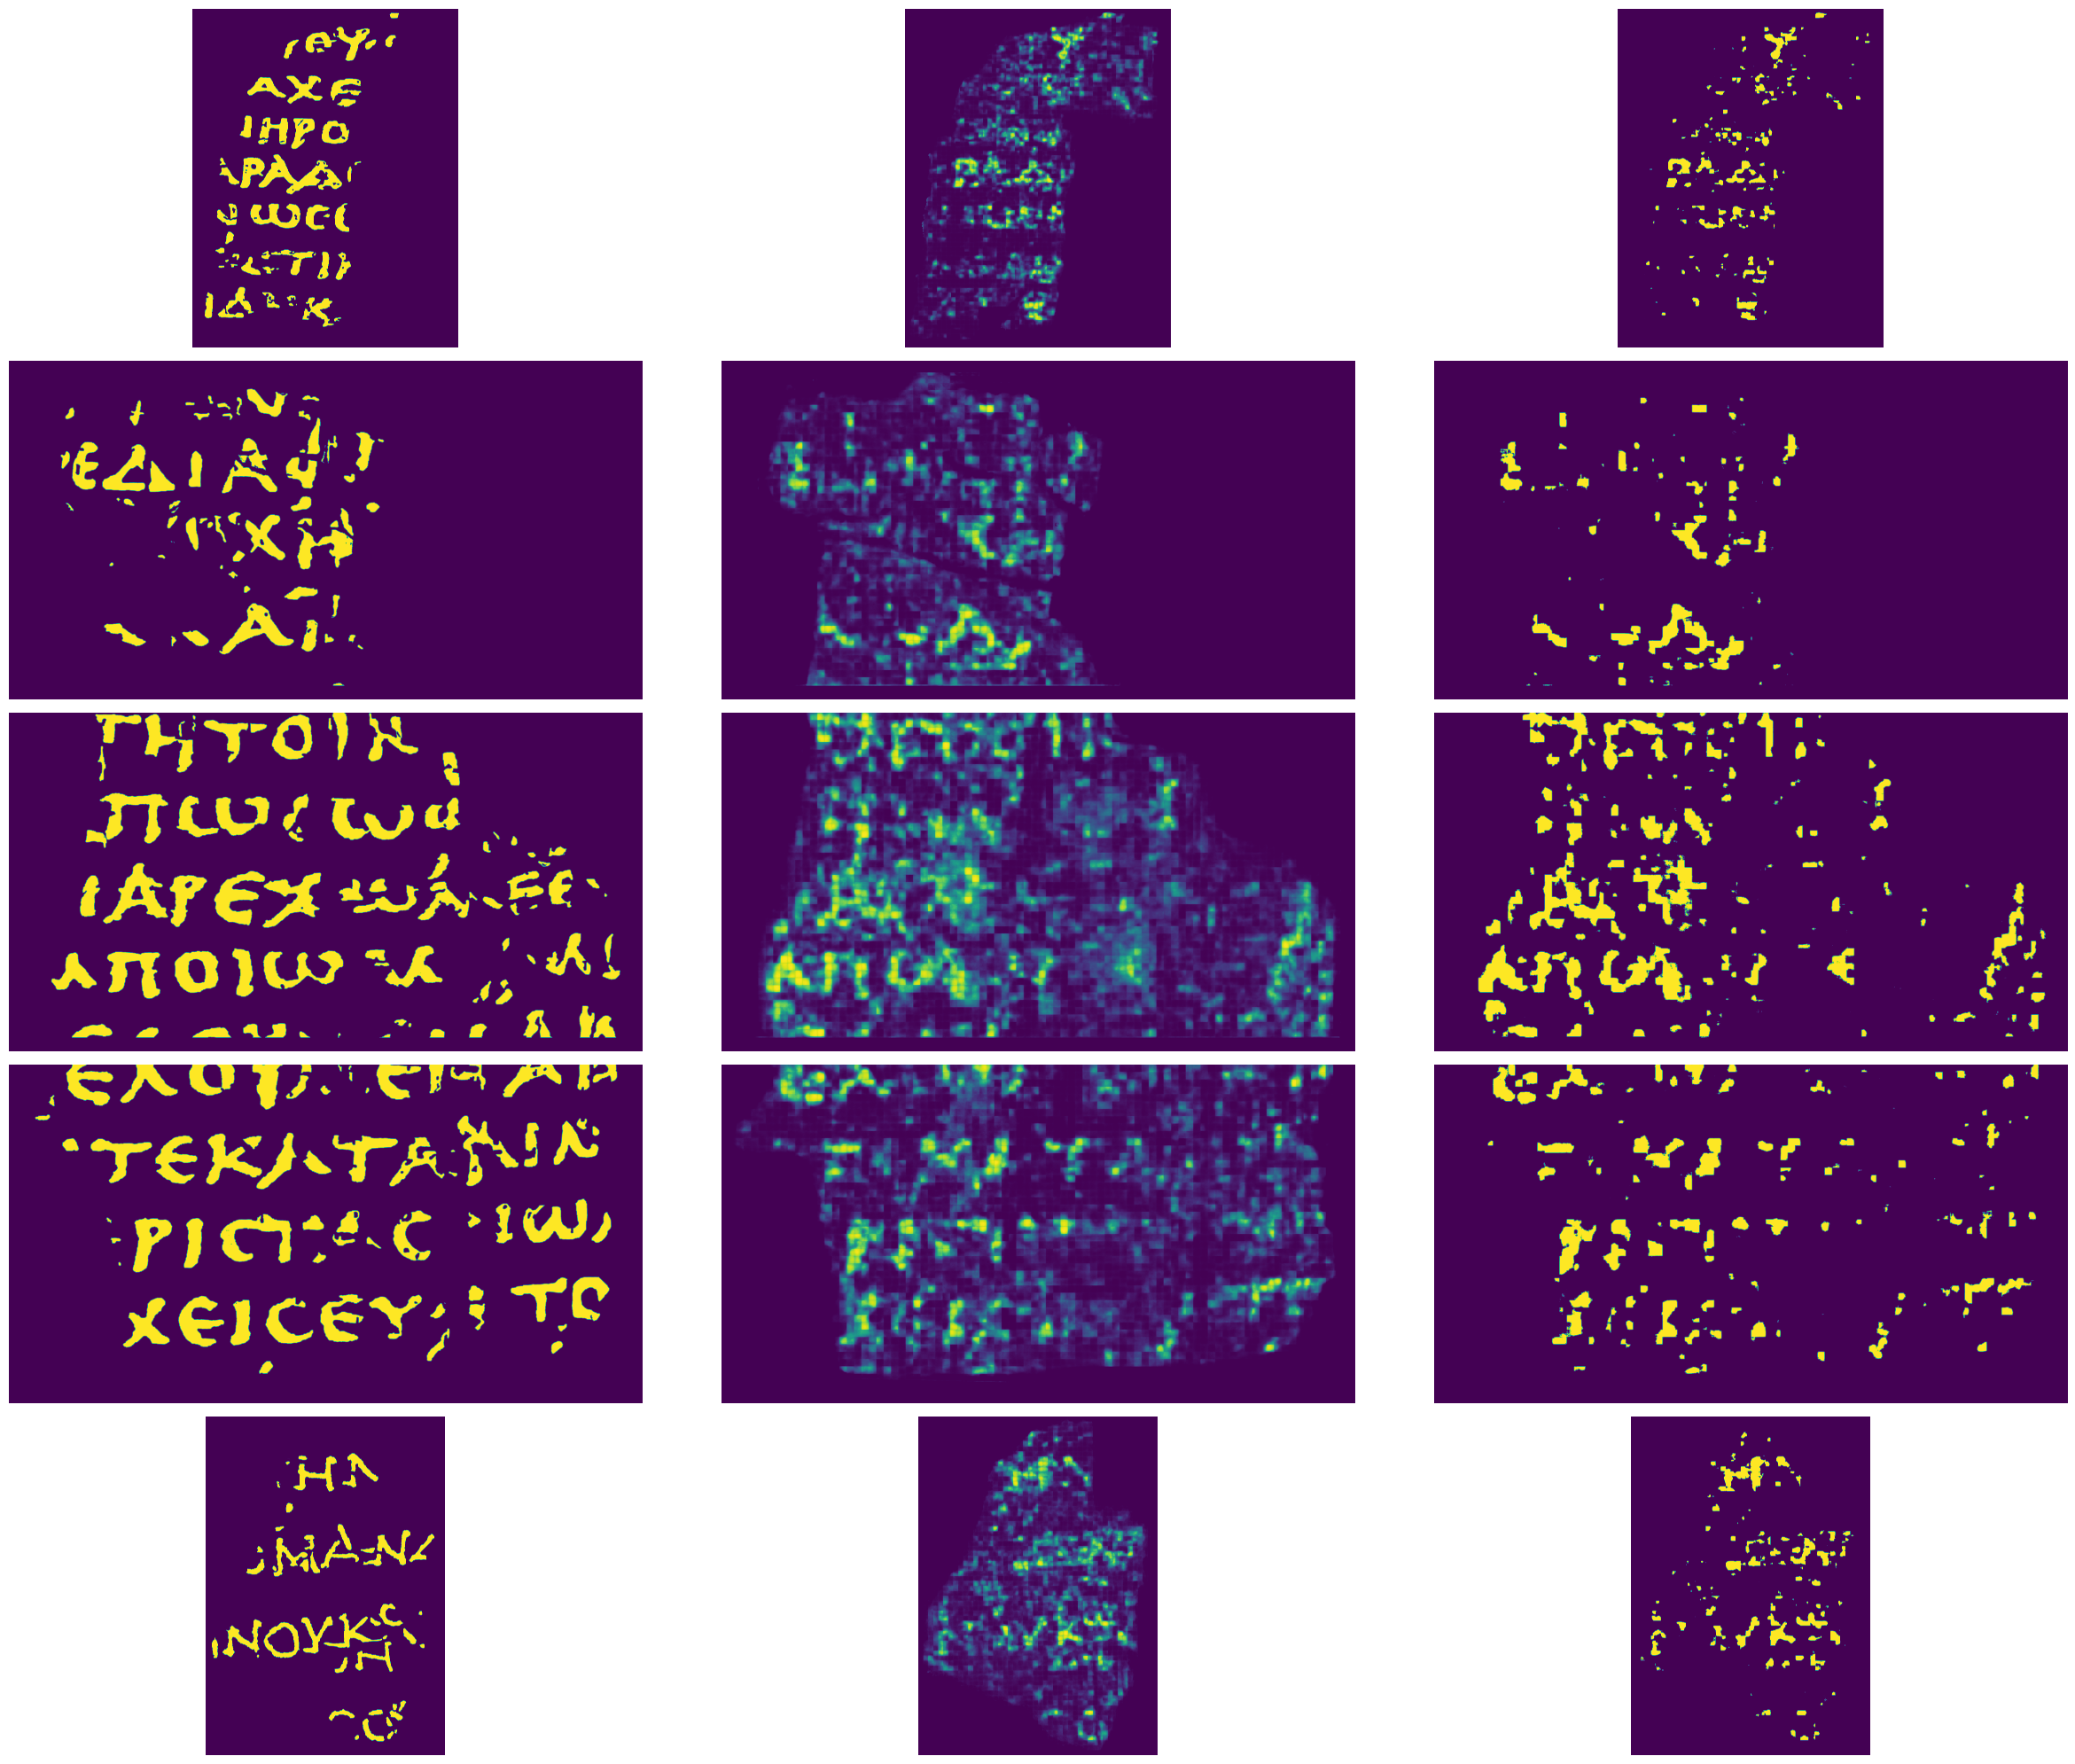

In [4]:
plot_inference(valid_label_gt_list, label_pred_list, CFG)